In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plots

plots.style.use('fivethirtyeight')

# Probability: Mathematical/Theoretical and Computational Approaches

*Dan L. Nicolae* 

We will see throughout this textbook that some problems can be solved either mathematically, or computationally (using simulations), or through a combination of analytical and computational approaches. Each approach has its strengths and, in this chapter, we use the calculation or estimation of probabilities to highlight some of them.

We illustrate the concepts we want to introduce with a classic probability problem called **the birthday problem**. Suppose you and a friend go to a party where there are 30 people (all unknown to both of you) and your friend wants to bet you that there are two people at that party who share their birthday. Would you be willing to take that bet? 

Your willingness to take the bet should be related to the chance of winning the bet. What do you think it is more likely to happen: finding a pair with shared birthdays or having 30 distinct birthdays? 

We will answer this question using the language of probability; we will calculate the probability of the event that at least two people share the birthdays in a group of 30 people. Next section will introduce the rules we need for deriving this probability. In the following section, we will also show how to estimate them using simulations.

Let's start with a simpler problem: what is the probability that two people share their birthday. Can you justify the following result?

$$P(\mbox{two random people have the same birthday}) ~=~ \frac{1}{365}$$

Think about the assumptions you implicitly or explicitly made in your justification. 

We will show in the next section that, given a number of people, **n** (with $2\leq n\leq 365$), the probability, $P_n$, that at least two share a birthday is given by:

$$P_n ~=~ 1-\frac{365\times364\times ...\times (365-n+1)}{365^n}$$

which can also be written as

$$P_n ~=~ 1-\frac{365}{365}\times\frac{364}{365}\times\frac{363}{365}\times ...\times \frac{(365-n+1)}{365}$$

The asssumptions used to obtain the above formula for $P_n$ are:

a. 365 days in a year;

b. All days are equally likely to be a birthday;

c. Subjects' birthdays are independent of each other (for example, no twins in the room).

The function below calculates these probabilities. Note that, for computational reasons, we implement the second formula for $P_n$: consider how large is $365^n$ for n= 30 or 50.

In [2]:
# a function that calculates the probability for 1<n<365
def birthday_prob(n):
    """Calculates the probability that at least 2 people 
       out of n have the same birthday"""
    prob=1
    for i in np.arange(n):
        prob = prob * (365-i)/365
    return round(1-prob,4)

We can use this function to calculate the probability for the above scenario (a group of 30 random people).

In [3]:
birthday_prob(30)

0.7063

The probability is close to 0.7 which means it is more likely your friend wins the bet.

Let's also look on how these probabilities change with $n$. We construct below a dataframe that contains these probabilities for $n$ ranging from 2 to 60.

In [4]:
# Construct a data frame with the probabilities for a range of n's
number_people=np.arange(2,61,1)
b_probs= np.array([]) # an empty array
for i in number_people: b_probs= np.append(b_probs,birthday_prob(i))

Birthday_df=pd.DataFrame(
    {"Number of people":number_people,
     "Probability":b_probs})
Birthday_df.head(7)

,Number of people,Probability
0,2,0.0027
1,3,0.0082
2,4,0.0164
3,5,0.0271
4,6,0.0405
5,7,0.0562
6,8,0.0743


We construct below a line graph of these probabilities that shows the trend. 

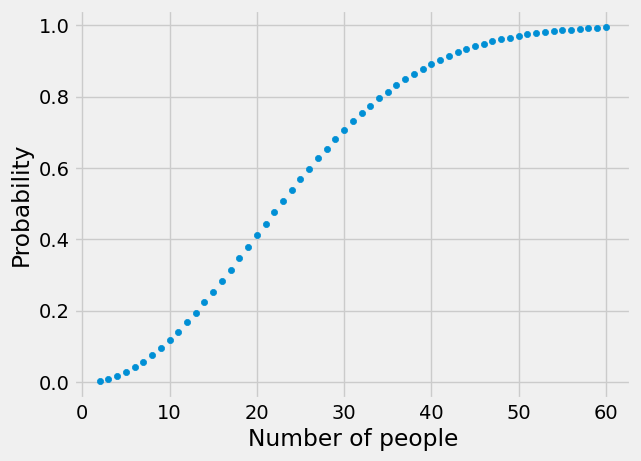

In [5]:
Birthday_df.plot.scatter("Number of people","Probability");

Are the above probabilities surprising? Can you provide an intuition for them? Note that the number of people that yields the probability closest to a fair bet is 23.

In [6]:
birthday_prob(23)

0.5073